In [4]:
import pandas as pd
import numpy as np

# Load the stock price data from a CSV file
file_path_stock_prices = 'SP500_close_price_no_missing.csv'  # Replace with your file path
stock_prices = pd.read_csv(file_path_stock_prices)

# Convert the 'date' column to datetime and set it as the index
stock_prices['date'] = pd.to_datetime(stock_prices['date'])
stock_prices.set_index('date', inplace=True)

# Calculate the log returns using log base 10
log10_returns = np.log10(stock_prices / stock_prices.shift(1))

# Drop the first row with NaN values due to the shift operation
log10_returns = log10_returns.dropna()

# Display the first few rows of the log10 returns
print(log10_returns.head())

# Exporting the log returns to a CSV file in the same directory as the Jupyter notebook
log10_returns.to_csv('log10_returns.csv')

print("Log returns have been saved as 'log10_returns.csv' in the notebook directory.")

                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.000601 -0.000279  0.004068 -0.013762  0.003043  0.015116   
2011-01-05  0.000000 -0.001469  0.000000 -0.006773  0.009677  0.006878   
2011-01-06 -0.002664 -0.001896 -0.000901 -0.014520  0.000673 -0.010858   
2011-01-07  0.000454 -0.003249  0.001799  0.000324 -0.003106  0.006941   
2011-01-10  0.004609 -0.005709 -0.003878  0.005398  0.012295  0.017355   

                 AES       AET       AFL         A  ...       WYN      WYNN  \
date                                                ...                       
2011-01-04  0.002073  0.002233 -0.007998 -0.004063  ... -0.002699  0.013341   
2011-01-05  0.005820  0.004156 -0.000847 -0.000943  ... -0.001427  0.005567   
2011-01-06  0.007418  0.008059 -0.002395  0.000838  ... -0.006336  0.003155   
2011-01-07  0.000000  0.000946 -0.001707  0.001463  ... -0.001599  0.015111   
2011-01

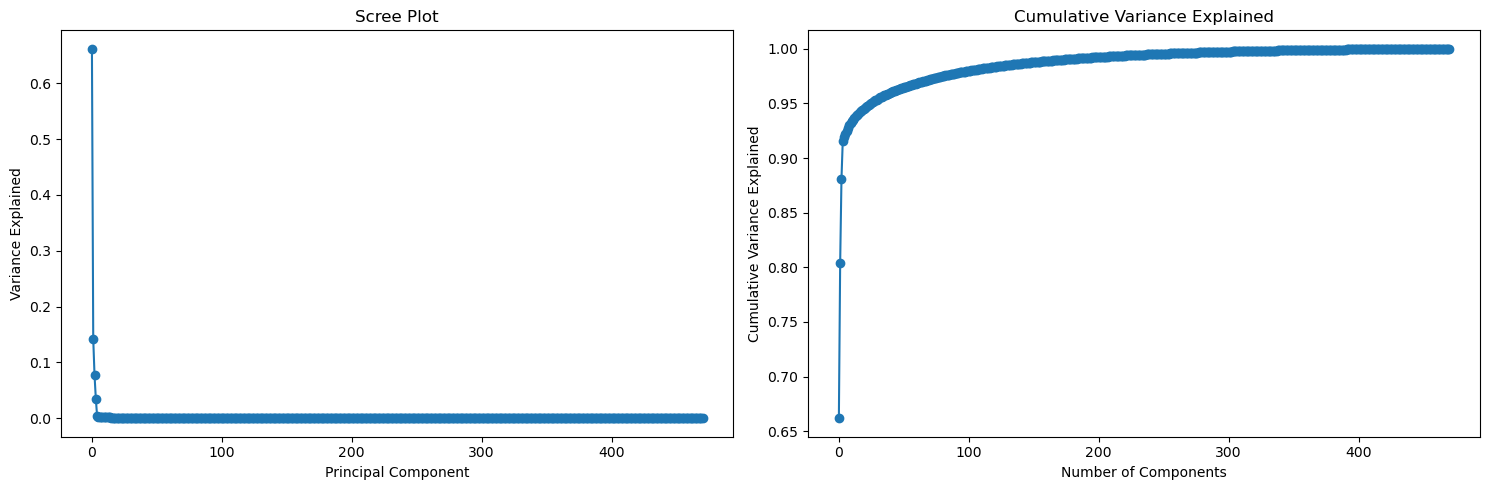

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of components for PCA
n_components = min(log_returns.shape)

# Creating a PCA model
pca = PCA(n_components=n_components)
pca.fit(log_returns)

# Eigenvalues (variance explained by each component)
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting the scree plot and cumulative variance plot
plt.figure(figsize=(15, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()


In [5]:
pip install yfinance

     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --- ------------------------------------ 0.2/2.9 MB 7.3 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/2.9 MB 9.6 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/2.9 MB 10.8 MB/s eta 0:00:01
     -------------------------- ------------- 2.0/2.9 MB 11.4 MB/s eta 0:00:01
     ---------------------------------- ----- 2.5/2.9 MB 10.8 MB/s eta 0:00:01
     ---------------------------------------  2.9/2.9 MB 11.7 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.

In [1]:
import pandas as pd
import yfinance as yf

# Load tickers from the CSV file
ticker_info = pd.read_csv('SP500_ticker.csv', encoding='ISO-8859-1')
tickers = ticker_info['ticker'].tolist()

# Downloading data for the specified tickers from Yahoo Finance
data = yf.download(tickers, start='2015-01-01')

# Extracting 'Close' prices
close_prices = data['Close']

# Saving the close prices to a CSV file
close_prices.to_csv('SP500_close_prices.csv')

print("Close prices saved to 'SP500_close_prices.csv'")


[*********************100%%**********************]  500 of 500 completed


102 Failed downloads:
['LLL', 'PKI', 'AKS', 'ETFC', 'RTN', 'AGN', 'CTXS', 'FTR', 'WIN', 'RHT', 'FISV', 'TIF', 'APC', 'TSS', 'FII', 'QEP', 'DISCA', 'PBCT', 'DF', 'DTV', 'CBS', 'DNR', 'FRX', 'NYX', 'VIAB', 'FLIR', 'CTL', 'BLL', 'BBBY', 'LSI', 'UTX', 'MON', 'BBT', 'STI', 'XLNX', 'MYL', 'VAR', 'ABC', 'RRD', 'YHOO', 'XL', 'JEC', 'CELG', 'RDC', 'COG', 'TMK', 'NBL', 'LM', 'JCP', 'AVP', 'CERN', 'SYMC', 'HRS']: Exception('%ticker%: No timezone found, symbol may be delisted')
['HSP', 'COH', 'MJN', 'JNS', 'JOY', 'PCLN', 'MOLX', 'JDSU', 'PCS', 'WPO', 'CVC', 'WLP', 'PGN', 'SNDK', 'TYC', 'MWV', 'KFT', 'ERTS', 'MWW', 'LXK', 'WAG', 'ZMH', 'LO', 'TWC', 'BCR', 'FDO', 'NVLS', 'CAM', 'SIAL', 'APOL', 'SWY', 'RAI', 'TLAB', 'CBG', 'WFM', 'LLTC', 'STJ', 'ARG', 'TE', 'SPLS', 'WYN', 'HCBK', 'TSO', 'BRCM', 'LUK', 'CFN', 'LTD', 'HCN', 'DPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-11-27)')



Close prices saved to 'SP500_close_prices.csv'


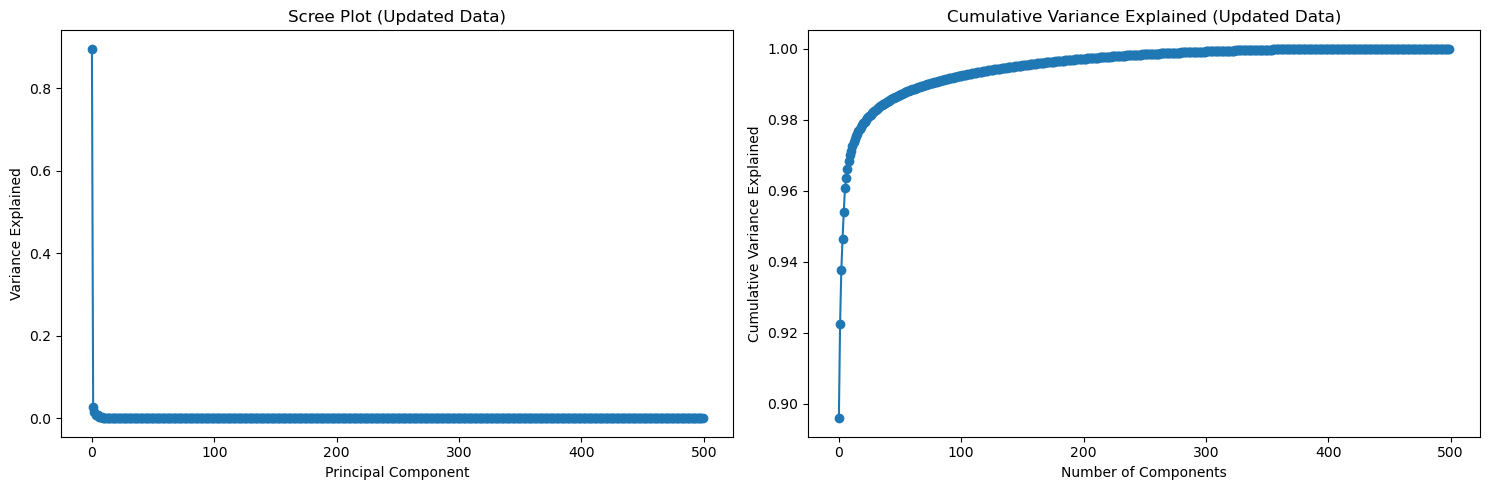

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the updated closing prices data
close_prices = pd.read_csv('SP500_close_prices.csv', index_col=0)

# Calculate log returns using log10
log10_returns_new = np.log10(close_prices / close_prices.shift(1))

# Filling NaN values in log10_returns with zeros instead of dropping rows
log10_returns_new.fillna(0, inplace=True)

# Apply PCA on the updated log10_returns
pca_updated = PCA()
pca_updated.fit(log10_returns_new)

# Plotting the scree plot and cumulative variance for the updated data
explained_variance_updated = pca_updated.explained_variance_ratio_
cumulative_variance_updated = np.cumsum(explained_variance_updated)

plt.figure(figsize=(15, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(explained_variance_updated, marker='o')
plt.title('Scree Plot (Updated Data)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance_updated, marker='o')
plt.title('Cumulative Variance Explained (Updated Data)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()
